https://www.youtube.com/watch?v=vG6tDQc86Rs&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=8

In [68]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset

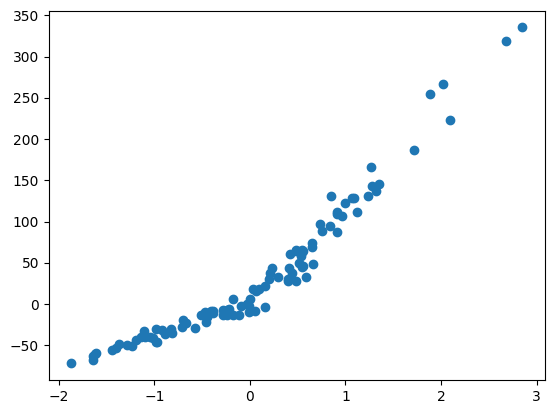

In [69]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y  + abs(y / 2)
plt.scatter(x, y)

In [70]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [71]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X.shape

(100, 3)

In [86]:
theta = np.random.randn(3, 1)
theta

array([[-0.91627088],
       [ 1.72999774],
       [-0.01644305]])

## Modèle

In [87]:
def model(X, theta):
    return X.dot(theta)

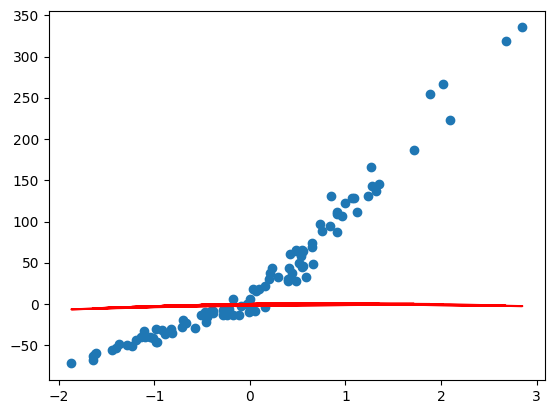

In [88]:
plt.scatter(x , y)
plt.plot(x, model(X, theta), c='r')


## Fontion coût

In [76]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2* m) * np.sum((model(X, theta) - y)**2)

In [77]:
cost_function(X, y, theta)

3907.5387331773713

## Gradients et descente de Gradient

In [78]:
def grad(X, y, theta):
    m = len(y)
    return 1 /m * X.T.dot(model(X, theta) - y)

In [79]:
def gradient_descent(X, y , theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta -= learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Machine learning

In [80]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [81]:
theta_final

array([[17.37613961],
       [73.95113669],
       [13.38507719]])

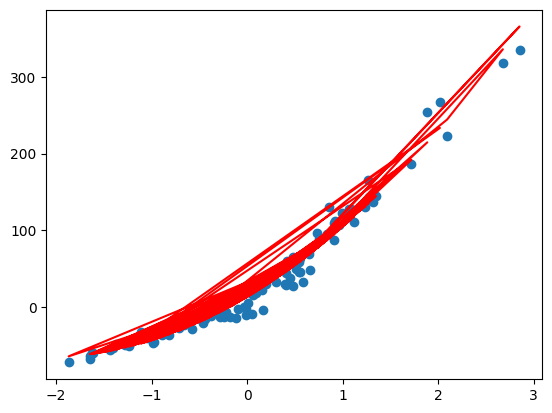

In [91]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

## Courbe d'apprentissage

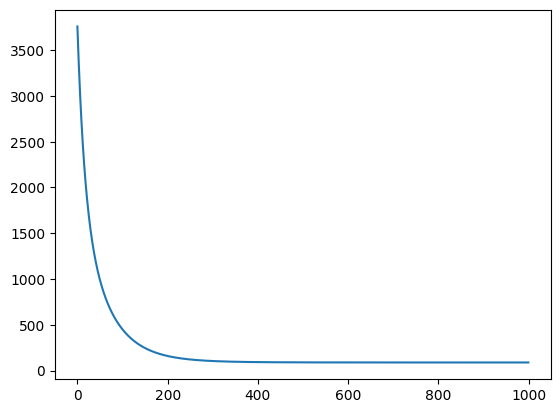

In [92]:
plt.plot(range(1000), cost_history)

## Coefficient de détermination

In [93]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [94]:
coef_determination(y, predictions)

0.9744033803038038